<a href="https://colab.research.google.com/github/Nirmalkumar1911/IndepVAR/blob/main/FlightTicketprice_prediction%20using%20RandomForestRegressor%5BRealData%20of%202019%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Business Problem*** : Your Employer owns a Travel Agency . He wants you to predict Domestic Flight Ticket Prices in India based on certain underlying variables , so that he can have Information Advantage and higher Negoitiating  power with his Clients, at the same time not lose his Clients to Competitiors. He gives you a Dataset [Real Data] containing the Variables and the Price of Tickets of previous year (2019) to create a Model , Using which the employer should be able to predict future Flight Ticket Prices with Reasoanble Accuracy.

**1.Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**2.Importing DataSet**

In [2]:
train_data=pd.read_excel('Data_Train.xlsx')

**3.Preliminary Analysis & Null Value Detection and Rectification**

In [3]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [6]:
train_data.shape

(10683, 11)

In [7]:
#Since the number of non-null datapoints(rows) is very high compared to Missing values we just drop them rather Imputation#
train_data.dropna(inplace=True)

In [8]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

**4.Data Preprocessing and Cleaning**

In [9]:
train_data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [10]:
#Since there are some columns with datetime type marked as Object type, we need to rectify it #
def change_into_datetime(col):
    train_data[col]=pd.to_datetime(train_data[col])

In [11]:
train_data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [12]:
for i in ['Date_of_Journey','Dep_Time', 'Arrival_Time']:
    change_into_datetime(i)

In [13]:
train_data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [14]:
#It is best to avoid datetime datatype as it is hard for the Model to take in its effects properly #
#Therefore we seperate it to month and date and convert it both to integers #
#We leave out Year as it is 2019 for all the DataPoints#
train_data['Journey_day']=train_data['Date_of_Journey'].dt.day

In [15]:
train_data['Journey_month']=train_data['Date_of_Journey'].dt.month

In [16]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2021-05-06 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-05-06 05:50:00,2021-05-06 13:15:00,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2021-05-06 09:25:00,2021-06-10 04:25:00,19h,2 stops,No info,13882,6,9
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2021-05-06 18:05:00,2021-05-06 23:30:00,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2021-05-06 16:50:00,2021-05-06 21:35:00,4h 45m,1 stop,No info,13302,3,1


**Note** : No need to panic when you see the dates shown in departure and arrival time column, Since the column was transformed from object to datetime datatype it arbitarily took in today's date. We will remove it later. 

In [17]:
# Since we have converted Date_of_Journey column into integers, Now we can drop as it is of no use #
train_data.drop('Date_of_Journey', axis=1, inplace=True)

In [18]:
# Similiar Conversion from Datetime to integers has to be done for two other Columns #
def extract_hour(df,col):
    df[col+"_hour"]=df[col].dt.hour
def extract_min(df,col):
    df[col+"_minute"]=df[col].dt.minute
def drop_column(df,col):
    df.drop(col,axis=1,inplace=True)    

In [19]:
# Similar to Date_of_Journey we can extract values from Arrival_Time #
# Extracting Hours #
extract_hour(train_data,'Arrival_Time')
# Extracting Minutes #
extract_min(train_data,'Arrival_Time')
# Now we can drop Dep_Time as it is of no use #
drop_column(train_data,'Arrival_Time')

In [20]:
# Similar to Date_of_Journey we can extract values from Dep_Time #
# Extracting Hours #
extract_hour(train_data,'Dep_Time')
# Extracting Minutes #
extract_min(train_data,'Dep_Time')
# Now we can drop Dep_Time as it is of no use #
drop_column(train_data,'Dep_Time')

In [21]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_hour,Dep_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,21,35,16,50


In [22]:
# Note that the Duration column is kind of Incomplete, with some datapoints existing without hours and some without Minutes#
# Lets fix that #
duration=list(train_data['Duration'])

for i in range(len(duration)):
    if len(duration[i].split(' '))==2:
        pass
    else:
        if 'h' in duration[i]:                   # if duration contains only hour
            duration[i]=duration[i] + ' 0m'      # Adds 0 minute
        else:
            duration[i]='0h '+ duration[i]       # if duration contains only hours, Adds 0 hour

In [23]:
# Reintegrate the Fixed Duration Column back to the DataFrame #
train_data['Duration']=duration

In [24]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_hour,Dep_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,21,35,16,50


In [25]:
#Just like the previous columns, it is better to covert duration to Integer than to datetime type for Better model#
# To do that we need to split the Duration column into two Columns, (ie) Hours and minutes  #
# At the same time we need to remove the 'h' and 'm' from those columns #
# let's create a function to do that and apply it to the entire column #
def hour(x):
    return x.split(' ')[0][0:-1]
def min(x):
    return x.split(' ')[1][0:-1]


In [26]:
train_data['Duration_hours']=train_data['Duration'].apply(hour)
train_data['Duration_mins']=train_data['Duration'].apply(min)

In [27]:
# Since the job is done , we can now remove the original Duration column #
train_data.drop('Duration',axis=1,inplace=True)

In [28]:
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_hour,Dep_Time_minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,4,25,9,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,21,35,16,50,4,45


In [29]:
# Lets check the DataTypes of all the Newly Created Columns #
train_data.dtypes

Airline                object
Source                 object
Destination            object
Route                  object
Total_Stops            object
Additional_Info        object
Price                   int64
Journey_day             int64
Journey_month           int64
Arrival_Time_hour       int64
Arrival_Time_minute     int64
Dep_Time_hour           int64
Dep_Time_minute         int64
Duration_hours         object
Duration_mins          object
dtype: object

In [30]:
# Some columns are automatically marked as Integers while some are not #
# This happens since the computer gets confused whether to mark it as Float or Integer , so it marks it as Object #
# Lets covert Datatype of those Columns to Integers #

train_data['Duration_hours']=train_data['Duration_hours'].astype(int)
train_data['Duration_mins']=train_data['Duration_mins'].astype(int)

In [31]:
train_data.dtypes

Airline                object
Source                 object
Destination            object
Route                  object
Total_Stops            object
Additional_Info        object
Price                   int64
Journey_day             int64
Journey_month           int64
Arrival_Time_hour       int64
Arrival_Time_minute     int64
Dep_Time_hour           int64
Dep_Time_minute         int64
Duration_hours          int64
Duration_mins           int64
dtype: object

**5.Visualizing the effects of Categorical Data on Ticket Prices**

In [32]:
train_data.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Total_Stops',
       'Additional_Info', 'Price', 'Journey_day', 'Journey_month',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Dep_Time_hour',
       'Dep_Time_minute', 'Duration_hours', 'Duration_mins'],
      dtype='object')

In [33]:
# First we'll have a seperate Dataframe for categorical data for sake of Convenience #
df = train_data.iloc[:,0:7]
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302


a. Effects of Airline

In [34]:
df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

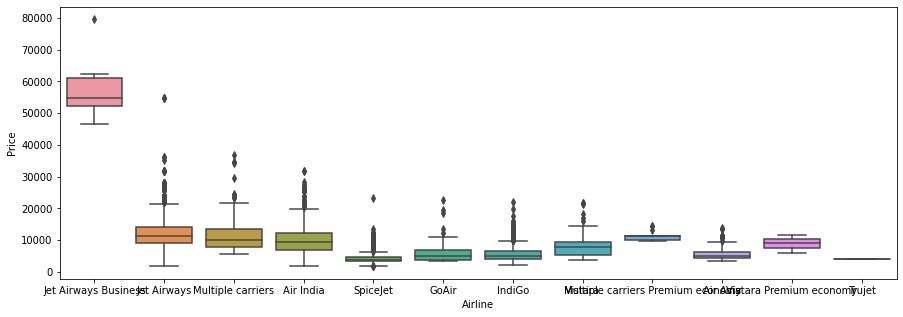

In [35]:
plt.figure(figsize=(15,5))
sns.boxplot(y='Price',x='Airline',data=df.sort_values('Price',ascending=False))

Note that Jet Airway's Median Price is Significantly high compared to other Airlines , while other Airlines Charge more or less the same Price

b. Effects of source

In [36]:
df['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

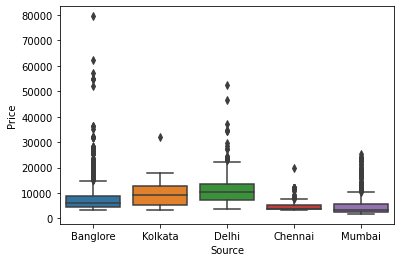

In [37]:
sns.boxplot(y='Price',x='Source',data=df)

c. Effects of Destination

In [38]:
df['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

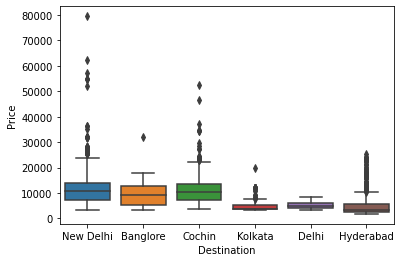

In [39]:
sns.boxplot(y='Price',x='Destination',data=df)

d. Effects of Total Stops

In [40]:
df['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

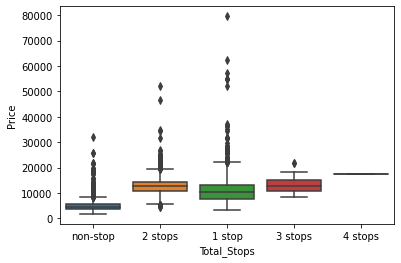

In [41]:
sns.boxplot(y='Price',x='Total_Stops',data=df)

In [42]:
df['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
Red-eye flight                     1
1 Short layover                    1
2 Long layover                     1
Name: Additional_Info, dtype: int64

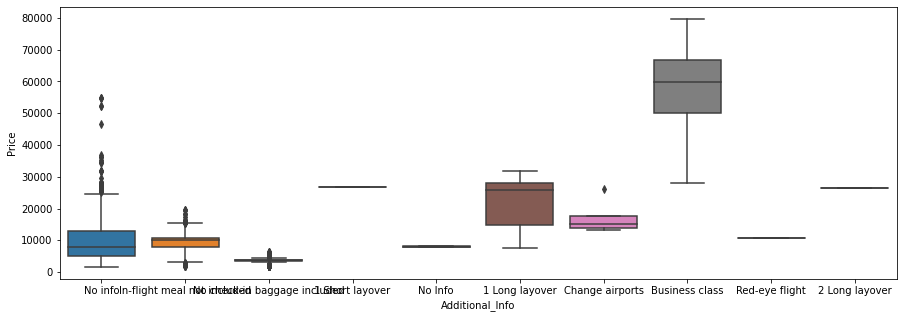

In [43]:
plt.figure(figsize=(15,5))
sns.boxplot(y='Price',x='Additional_Info',data=df)

**6.Encoding Categorical Data**

In [44]:
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_hour,Dep_Time_minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,4,25,9,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,21,35,16,50,4,45


In [45]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0,1,2,5])],remainder='passthrough')
train_data = ct.fit_transform(train_data)

In [46]:
train_data = pd.DataFrame(train_data)
train_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43
0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,BLR → DEL,non-stop,3897,24,3,1,10,22,20,2,50
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,CCU → IXR → BBI → BLR,2 stops,7662,5,1,13,15,5,50,7,25
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,DEL → LKO → BOM → COK,2 stops,13882,6,9,4,25,9,25,19,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,CCU → NAG → BLR,1 stop,6218,5,12,23,30,18,5,5,25
4,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,BLR → NAG → DEL,1 stop,13302,3,1,21,35,16,50,4,45


In [47]:
# Total Stops is Little different , we dont need to encode it #
# we just need to map it to the number of stops #
train_data[34].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [48]:
dict={'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}
train_data[34]=train_data[34].map(dict)
train_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43
0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,BLR → DEL,0,3897,24,3,1,10,22,20,2,50
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,CCU → IXR → BBI → BLR,2,7662,5,1,13,15,5,50,7,25
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,DEL → LKO → BOM → COK,2,13882,6,9,4,25,9,25,19,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,CCU → NAG → BLR,1,6218,5,12,23,30,18,5,5,25
4,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,BLR → NAG → DEL,1,13302,3,1,21,35,16,50,4,45


In [49]:
# Only the Route column is left for Encoding #
# This one is little tricky to encode #
# First Lets Split the Route Column #
train_data['Route_1']=train_data[33].str.split('→').str[0]
train_data['Route_2']=train_data[33].str.split('→').str[1]
train_data['Route_3']=train_data[33].str.split('→').str[2]
train_data['Route_4']=train_data[33].str.split('→').str[3]
train_data['Route_5']=train_data[33].str.split('→').str[4]
train_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,Route_1,Route_2,Route_3,Route_4,Route_5
0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,BLR → DEL,0,3897,24,3,1,10,22,20,2,50,BLR,DEL,NaN,NaN,NaN
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,CCU → IXR → BBI → BLR,2,7662,5,1,13,15,5,50,7,25,CCU,IXR,BBI,BLR,NaN
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,DEL → LKO → BOM → COK,2,13882,6,9,4,25,9,25,19,0,DEL,LKO,BOM,COK,NaN
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,CCU → NAG → BLR,1,6218,5,12,23,30,18,5,5,25,CCU,NAG,BLR,NaN,NaN
4,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,BLR → NAG → DEL,1,13302,3,1,21,35,16,50,4,45,BLR,NAG,DEL,NaN,NaN


In [50]:
# Lets Replace those null Values in the seperated route columns as None #
train_data['Route_1'].fillna('None',inplace=True)
train_data['Route_2'].fillna('None',inplace=True)
train_data['Route_3'].fillna('None',inplace=True)
train_data['Route_4'].fillna('None',inplace=True)
train_data['Route_5'].fillna('None',inplace=True)
train_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,Route_1,Route_2,Route_3,Route_4,Route_5
0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,BLR → DEL,0,3897,24,3,1,10,22,20,2,50,BLR,DEL,None,None,None
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,CCU → IXR → BBI → BLR,2,7662,5,1,13,15,5,50,7,25,CCU,IXR,BBI,BLR,None
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,DEL → LKO → BOM → COK,2,13882,6,9,4,25,9,25,19,0,DEL,LKO,BOM,COK,None
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,CCU → NAG → BLR,1,6218,5,12,23,30,18,5,5,25,CCU,NAG,BLR,None,None
4,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,BLR → NAG → DEL,1,13302,3,1,21,35,16,50,4,45,BLR,NAG,DEL,None,None


In [51]:
# Now Lets Encode the Seperated Route Columns #
# Since the number of categories in the routes are very high lets encode them with a Label rather than One Hot Encoder #
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
for i in ['Route_1', 'Route_2', 'Route_3', 'Route_4','Route_5']:
    train_data[i]=encoder.fit_transform(train_data[i])
# Lets drop the route column as it is no longer necessary #    
drop_column(train_data,33) 
train_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,34,35,36,37,38,39,40,41,42,43,Route_1,Route_2,Route_3,Route_4,Route_5
0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,3897,24,3,1,10,22,20,2,50,0,13,29,13,5
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,7662,5,1,13,15,5,50,7,25,2,25,1,3,5
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,13882,6,9,4,25,9,25,19,0,3,32,4,5,5
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,6218,5,12,23,30,18,5,5,25,2,34,3,13,5
4,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,13302,3,1,21,35,16,50,4,45,0,34,8,13,5


In [52]:
# Data Cleaning and Preprocessing is Almost done #
# Inorder to Improve Accuracy and Avoid Outliers we need to Scale the Features #
# Feature Scaling is the last part of Data Preprocessing #
# But before we Scale the features we need to split the Data into Training and Test set #
# This is done inorder to avoid Information Leakage #

**7.Splitting the DataSet**

In [53]:
# Splitting the data into Dependent and Independent Variables #
x1 = train_data.iloc[:,0:33]
x1.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32
0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0


In [54]:
x2 = train_data.iloc[:,33]
x2.head()

0    0
1    2
2    2
3    1
4    1
Name: 34, dtype: int64

In [55]:
y = train_data.iloc[:,34]
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: 35, dtype: object

In [56]:
x3 = train_data.iloc[:,35:]
x3.head()

,36,37,38,39,40,41,42,43,Route_1,Route_2,Route_3,Route_4,Route_5
0,24,3,1,10,22,20,2,50,0,13,29,13,5
1,5,1,13,15,5,50,7,25,2,25,1,3,5
2,6,9,4,25,9,25,19,0,3,32,4,5,5
3,5,12,23,30,18,5,5,25,2,34,3,13,5
4,3,1,21,35,16,50,4,45,0,34,8,13,5


In [57]:
x = pd.concat([x1,x2,x3],axis=1)
x.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,34,36,37,38,39,40,41,42,43,Route_1,Route_2,Route_3,Route_4,Route_5
0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,24,3,1,10,22,20,2,50,0,13,29,13,5
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,5,1,13,15,5,50,7,25,2,25,1,3,5
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,6,9,4,25,9,25,19,0,3,32,4,5,5
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,5,12,23,30,18,5,5,25,2,34,3,13,5
4,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,3,1,21,35,16,50,4,45,0,34,8,13,5


In [58]:
# Splitting the Variables into Train set and Test set #
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=0)

In [59]:
x_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,34,36,37,38,39,40,41,42,43,Route_1,Route_2,Route_3,Route_4,Route_5
508,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,21,5,18,50,20,20,22,30,2,14,3,13,5
3071,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,24,3,14,25,6,35,7,50,2,20,3,13,5
2036,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,3,6,10,25,22,50,11,35,0,7,8,13,5
49,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2,27,6,19,0,23,5,19,55,3,0,4,5,5
9685,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,27,5,0,50,22,15,2,35,2,5,29,13,5


In [60]:
y_test = pd.DataFrame(y_test)
y_train = pd.DataFrame(y_train)
y_train.head()

,35
508,9345
3071,4773
2036,17261
49,11150
9685,4804


**8.Feature Scaling**

In [61]:
from sklearn.preprocessing import StandardScaler
scx = StandardScaler()
scy = StandardScaler()
x_train = scx.fit_transform(x_train)
x_test = scx.transform(x_test)
y_train = scy.fit_transform(y_train)

In [62]:
x_train[:,:2]

array([[-0.17360483, -0.44057105],
       [-0.17360483, -0.44057105],
       [-0.17360483, -0.44057105],
       ...,
       [-0.17360483, -0.44057105],
       [-0.17360483, -0.44057105],
       [-0.17360483, -0.44057105]])

In [63]:
y_train[:,:2]

array([[ 0.0636608 ],
       [-0.94100672],
       [ 1.80315075],
       ...,
       [ 1.75107153],
       [ 0.63960865],
       [ 0.8815463 ]])

Now Cleaning ,Preprocessing and Feature Scaling of the Raw Data is Finished . The Dataset is ready to be Trained in a Machine Learning Model

**9.Training the Model**

In [64]:
# We will use Random Forest Machine Learning Technique for this Dataset #
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10 , random_state =0)
regressor.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [65]:
# Predicting the Value for Test set #
y_pred = scy.inverse_transform(regressor.predict(x_test))
y_pred[:10]

array([14592. ,  6172.6,  3597. , 11197.6,  4825. ,  8610.8, 12242. ,
        6673.3,  4568.8, 11700.3])

**10.Accuracy Matrix and R Squared**

In [66]:
y_pred = y_pred.reshape(len(y_pred),1)
y_test = np.array(y_test)
y_test = y_test.reshape(len(y_test),1)
Accuracy_Matrix = np.concatenate((y_pred,y_test),1)
Accuracy_Matrix[:10]

array([[14592.0, 14781],
       [6172.6, 5636],
       [3597.000000000001, 3597],
       [11197.6, 16757],
       [4825.000000000001, 4804],
       [8610.8, 8586],
       [12242.0, 12242],
       [6673.299999999999, 7001],
       [4568.8, 4030],
       [11700.3, 11948]], dtype=object)

In [67]:
from sklearn.metrics import r2_score   
r2_score(y_test, y_pred)   

0.8638720443224117

In [68]:
# adj r2 = [1-(1-r2)]*[(n-1)/(n-p-1)] #
# Where n is number of observations in sample and p is number of independent variables in model #
Adj_r2_score = (1-(1-r2_score(y_test, y_pred))*((len(x_test)-1)/(len(x_test)-len(x_test[0])-1)))
Adj_r2_score

0.8608093282300964

***From the Adjusted R Squared score we can see that the model is a Good fit.Therefore we can use the ML model to predict the Future Ticket Prices with 86% Accuracy for the Benefit of the Employer***